In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import seaborn as sns
sns.set(font_scale=1.5)

In [3]:
# Open crop extent (your study area extent boundary)
crop_extent = gpd.read_file(
    '/home/marta/PycharmProjects/Earth analytics/spatial/boulder-leehill-rd/clip-extent.shp')

with rio.open('/home/marta/PycharmProjects/Earth analytics/spatial/outputs/lidar_chm.tiff') as src:
    print(src.crs)
    
print('crop extent crs: ', crop_extent.crs)



EPSG:32613
crop extent crs:  {'init': 'epsg:32613'}


Text(0.5, 1, 'Shapefile Crop Extent')

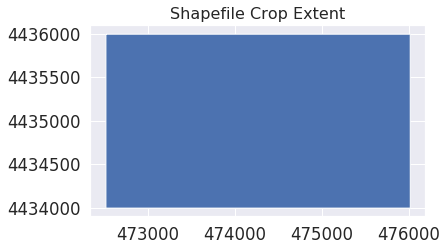

In [4]:
fig, ax = plt.subplots(figsize=(6, 6))
crop_extent.plot(ax=ax)
ax.set_title("Shapefile Crop Extent",
             fontsize=16)

/home/marta/.local/lib/python3.6/site-packages/numpy/ma/core.py:1015: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


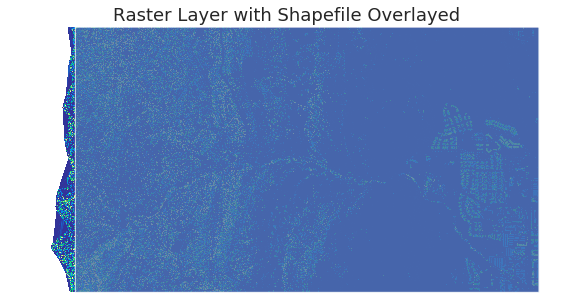

In [16]:
dtm_path = '/home/marta/PycharmProjects/Earth analytics/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif'
dsm_path = '/home/marta/PycharmProjects/Earth analytics/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DSM.tif'
with rio.open(dtm_path) as src:
    lidar_dtm_im = src.read(1, masked=True)
    spatial_extent = plotting_extent(src)

with rio.open(dsm_path) as src:
    lidar_dsm_im = src.read(1, masked=True)
    spatial_extent = plotting_extent(src)

lidar_chm_im = lidar_dsm_im - lidar_dtm_im
lidar_chm_im

fig, ax = plt.subplots(figsize=(10, 8))
ep.plot_bands(lidar_chm_im, cmap='terrain',
              extent=plotting_extent(src),
              ax=ax,
              title="Raster Layer with Shapefile Overlayed",
              cbar=False)
crop_extent.plot(ax=ax, alpha=.8)
ax.set_axis_off()


In [17]:
with rio.open("/home/marta/PycharmProjects/Earth analytics/spatial/boulder-leehill-rd/outputs/lidar_chm.tif") as lidar_chm:
    lidar_chm_crop, lidar_chm_crop_meta = es.crop_image(lidar_chm,crop_extent)

lidar_chm_crop_affine = lidar_chm_crop_meta["transform"]
# Create spatial plotting extent for the cropped layer
lidar_chm_extent = plotting_extent(lidar_chm_crop[0], lidar_chm_crop_affine)


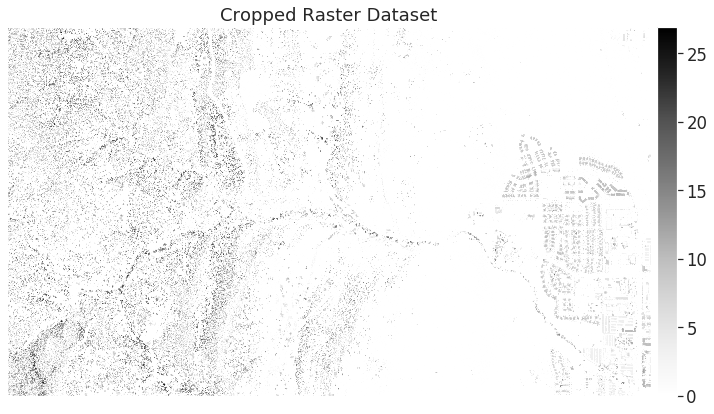

In [18]:
# Plot your data
ep.plot_bands(lidar_chm_crop[0],
              extent=lidar_chm_extent,
              cmap='Greys',
              title="Cropped Raster Dataset",
              scale=False)
plt.show()


In [19]:
# Update with the new cropped affine info and the new width and height
lidar_chm_meta.update({'transform': lidar_chm_crop_affine,
                       'height': lidar_chm_crop.shape[1],
                       'width': lidar_chm_crop.shape[2],
                       'nodata': -999.99})
lidar_chm_meta


NameError: name 'lidar_chm_meta' is not defined